In [1]:
import pandas as pd
import utilities as UT
import numpy as np
import seaborn as sns
import os

In [2]:
#UT.clean_df?

In [3]:
df = pd.read_csv('proteinGroups.txt',sep='\t')
df=UT.clean_df(df,score=5)
df = UT.mod_df(df)
df.head()

starting from: (226, 86)
removed  8 Protein Groups by: Only identified by site
tot  8  entries removed
---------------
removed  2 Protein Groups by: Reverse
tot  10  entries removed
---------------
removed  28 Protein Groups by: Potential contaminant
tot  38  entries removed
---------------
Score
nothing removed
---------------
removed  40 Protein Groups by: Peptide counts (unique)
tot  78  entries removed
---------------


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs,unique_int,Gene_id,desc
32,sp|P01870|IGHG_RABIT;tr|A0A0C6G052|A0A0C6G052_...,sp|P01870|IGHG_RABIT,34;7,34;7,34;7,sp|P01870|IGHG_RABIT Ig gamma chain C region O...,2,34,34,34,...,84;85;86;115;122;232;233;307;398;399;400;401;4...,211;212;213;214;215;216;217;218;219;220;221;31...,235;236;237;238;239;240;241;242;243;244;245;24...,242;248;249;347;378;721;917;1365;1368;1617;162...,25;26;27;28,128;227;244;304,-1;-1,34,sp|P01870|IGHG_RABIT,Ig gamma chain C region
33,Tb927.10.4450:mRNA-p1;Tb11.v5.0757.1-p1;Tb10.v...,Tb927.10.4450:mRNA-p1;Tb11.v5.0757.1-p1;Tb10.v...,3;3;3,3;3;3,3;3;3,Tb927.10.4450:mRNA-p1 | transcript=Tb927.10.44...,3,3,3,3,...,73;679;756,175;176;1921;1922;2116,192;193;2218;2219;2442,193;2219;2442,NaN,NaN,-1;-1;-1,3,Tb927.10.4450,"stress-inducible protein STI1-like, putative"
35,Tb927.11.13007:mRNA-p1;Tb927.11.13003:mRNA-p1;...,Tb927.11.13007:mRNA-p1;Tb927.11.13003:mRNA-p1;...,2;2;2;2;2,2;2;2;2;2,2;2;2;2;2,Tb927.11.13007:mRNA-p1 | transcript=Tb927.11.1...,5,2,2,2,...,313;1182,815;816;3395;3396;3397,937;938;3879;3880;3881,937;3880,NaN,NaN,-1;-1;-1;-1;-1,2,Tb927.11.13007,ubiquitin-60S ribosomal protein L40
36,Tb927.6.4980:mRNA-p1;Tb927.11.7705:mRNA-p1;Tb1...,Tb927.6.4980:mRNA-p1;Tb927.11.7705:mRNA-p1;Tb1...,2;2;2;2,2;2;2;2,2;2;2;2,Tb927.6.4980:mRNA-p1 | transcript=Tb927.6.4980...,4,2,2,2,...,553;1086,1569;1570;3084;3085;3086,1848;1849;3539;3540;3541,1849;3539,NaN,NaN,-1;-1;-1;-1,2,Tb927.6.4980,40S ribosomal protein S14
37,Tb927.11.1840:mRNA-p1;Tb11.1380.1-p1,Tb927.11.1840:mRNA-p1;Tb11.1380.1-p1,15;15,15;15,15;15,Tb927.11.1840:mRNA-p1 | transcript=Tb927.11.18...,2,15,15,15,...,50;104;283;296;300;325;574;689;765;769;816;920...,125;275;276;743;776;777;778;779;783;784;858;16...,134;135;306;307;858;895;896;897;898;902;903;98...,135;307;858;897;903;985;1923;2266;2480;2494;27...,31;32;33,1;127;133,-1;-1,15,Tb927.11.1840,"hypothetical protein, conserved"


In [4]:
col = ['iBAQ ZJ_{id}'.format(id=n) for n in range(1,9)]
selection = df[col]
print(selection.shape)
selection.head()
#list(df.columns)
##selection = df[col].replace(0,np.nan)
#selection = selection.fillna(selection.min())
#selection.head()
selection = selection.replace(0,np.nan).dropna(how='all')

(148, 8)


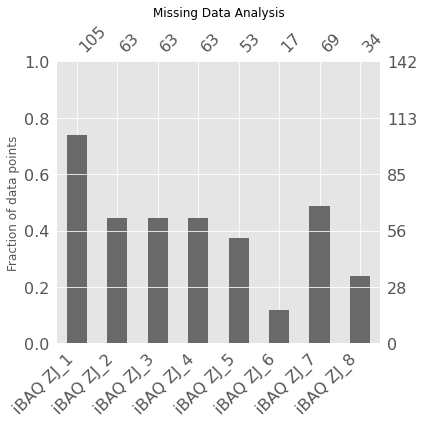

In [5]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan),figsize=(6, 6))
plt.title('Missing Data Analysis',size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.tight_layout()
plt.savefig('missing.png')
plt.show()

In [6]:
#color palette
palette=['b','b','b','b','b','b','b','b']
palette_g = ['b']
color_dictionary = { 'b':'-'}

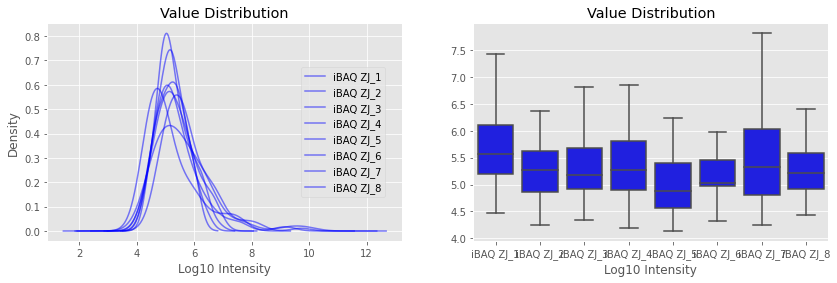

In [7]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(14,4))

np.log10(selection.replace(0,np.nan)).plot(
    kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.show()

In [8]:
comparisons= [1,3,7]
for n in comparisons:
    bait_col = 'iBAQ ZJ_{id}'.format(id=n)
    control_col = 'iBAQ ZJ_5'
    df['log10sum_{}'.format(n)]=np.log10(df[bait_col].replace(0,np.nan)
                                      .fillna(df[bait_col]
                                              .replace(0,np.nan).min())+df[control_col]
                                        .replace(0,np.nan)
                                        .fillna(df[control_col].replace(0,np.nan).min()))
    
    df['log2fc_{}'.format(n)]=np.log2(df[bait_col]
                                      .replace(0,np.nan)
                                      .fillna(df[bait_col]
                                              .replace(0,np.nan).min()) /
                                        df[control_col]
                                        .replace(0,np.nan)
                                        .fillna(df[control_col].replace(0,np.nan).min()))
     
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Taxonomy IDs,unique_int,Gene_id,desc,log10sum_1,log2fc_1,log10sum_3,log2fc_3,log10sum_7,log2fc_7
32,sp|P01870|IGHG_RABIT;tr|A0A0C6G052|A0A0C6G052_...,sp|P01870|IGHG_RABIT,34;7,34;7,34;7,sp|P01870|IGHG_RABIT Ig gamma chain C region O...,2,34,34,34,...,-1;-1,34,sp|P01870|IGHG_RABIT,Ig gamma chain C region,9.726573,18.574466,9.156523,16.680790,9.869479,19.049189
33,Tb927.10.4450:mRNA-p1;Tb11.v5.0757.1-p1;Tb10.v...,Tb927.10.4450:mRNA-p1;Tb11.v5.0757.1-p1;Tb10.v...,3;3;3,3;3;3,3;3;3,Tb927.10.4450:mRNA-p1 | transcript=Tb927.10.44...,3,3,3,3,...,-1;-1;-1,3,Tb927.10.4450,"stress-inducible protein STI1-like, putative",4.640293,1.137705,4.547344,0.663304,4.498504,0.388341
35,Tb927.11.13007:mRNA-p1;Tb927.11.13003:mRNA-p1;...,Tb927.11.13007:mRNA-p1;Tb927.11.13003:mRNA-p1;...,2;2;2;2;2,2;2;2;2;2,2;2;2;2;2,Tb927.11.13007:mRNA-p1 | transcript=Tb927.11.1...,5,2,2,2,...,-1;-1;-1;-1;-1,2,Tb927.11.13007,ubiquitin-60S ribosomal protein L40,5.843631,5.647108,4.547344,0.663304,6.195609,6.832254
36,Tb927.6.4980:mRNA-p1;Tb927.11.7705:mRNA-p1;Tb1...,Tb927.6.4980:mRNA-p1;Tb927.11.7705:mRNA-p1;Tb1...,2;2;2;2,2;2;2;2,2;2;2;2,Tb927.6.4980:mRNA-p1 | transcript=Tb927.6.4980...,4,2,2,2,...,-1;-1;-1;-1,2,Tb927.6.4980,40S ribosomal protein S14,5.185372,-0.495620,5.046374,-2.052252,5.031481,-2.327216
37,Tb927.11.1840:mRNA-p1;Tb11.1380.1-p1,Tb927.11.1840:mRNA-p1;Tb11.1380.1-p1,15;15,15;15,15;15,Tb927.11.1840:mRNA-p1 | transcript=Tb927.11.18...,2,15,15,15,...,-1;-1,15,Tb927.11.1840,"hypothetical protein, conserved",6.128169,4.288583,5.338215,1.221595,5.115973,-0.003734


In [9]:
df.loc[132]

Protein IDs                      Tb927.11.9130:mRNA-p1
Majority protein IDs             Tb927.11.9130:mRNA-p1
Peptide counts (all)                                 3
Peptide counts (razor+unique)                        3
Peptide counts (unique)                              3
                                         ...          
log2fc_1                                       3.03663
log10sum_3                                     4.54734
log2fc_3                                      0.663304
log10sum_7                                      4.4985
log2fc_7                                      0.388341
Name: 132, Length: 95, dtype: object

In [11]:
df.loc[selection.index.values].iloc[:,-8:].reset_index(drop=True).replace(-np.inf,0).round(2).to_csv('indata.csv')

In [12]:
fontProperties = {'family':'Arial',
    'weight' : 'normal', 'size' : 7}
fontProperties_names = {'family':'Arial',
    'weight' : 'bold', 'size' : 7}


In [13]:
df['desc2']=df['desc']+' '+df['Gene_id']

In [14]:
import plotly.express as px
import plotly

In [15]:
fig = px.scatter(df,x='log2fc_1',y='log10sum_1',
                 hover_name='Gene_id',hover_data=['desc'],title='1 vs 5')
plotly.offline.plot(fig, filename='1vs5.html')

'1vs5.html'

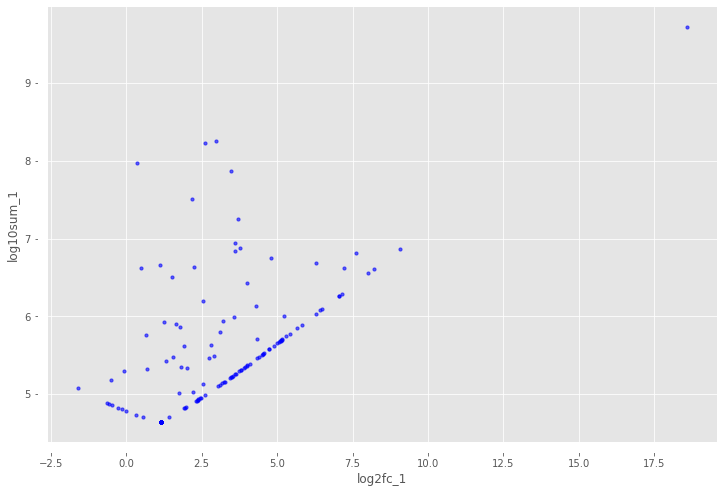

In [23]:

temp = df.copy()

#temp = temp[temp['Razor + unique peptides']>2]

fig,ax = plt.subplots(figsize=(12,8))
sns.regplot(x='log2fc_1', y='log10sum_1',
            fit_reg=False, data = temp,##[df['exp_lf']>0.8],
            ax=ax, scatter_kws={'s':10,'alpha':0.6},color='b')
sns.despine(offset=10, trim=True)
#x_val = temp.loc['Tb927.3.2610']['signal_perc']
#y_val = temp.loc['Tb927.3.2610']['Log10_score']
#ax.scatter(x_val,y_val, s=35, c='r')
#ax.annotate('Bait', xy=(x_val, y_val), xytext=(x_val+0.01, y_val),
#            )

#x_val = temp.loc['Tb927.11.11750']['signal_perc']
#y_val = temp.loc['Tb927.11.11750']['Log10_score']
#ax.scatter(x_val,y_val, s=35, c='r')
#ax.annotate('Tb927.11.11750', xy=(x_val, y_val), xytext=(x_val+0.01, y_val),
#            )
plt.savefig('Plot_1.svg')
plt.savefig('Plot_1.png')

In [76]:
fig = px.scatter(df,x='log2fc_3',y='log10sum_3',hover_name='Gene_id',
           hover_data=['desc'],title='3 vs 5')
plotly.offline.plot(fig, filename='3vs5.html')

'3vs5.html'

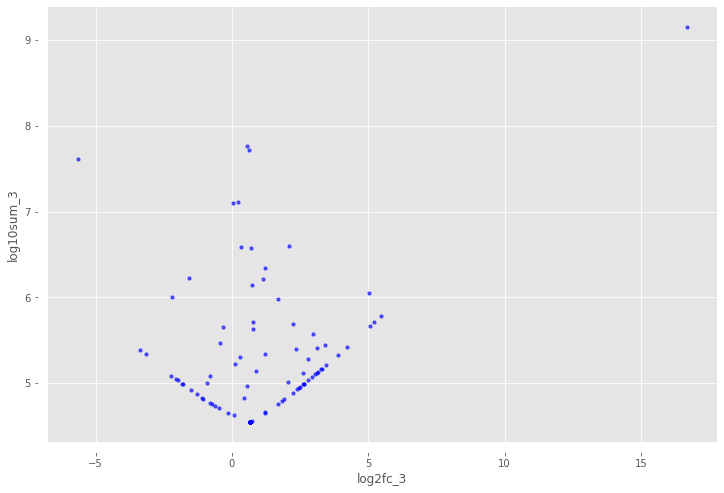

In [24]:

temp = df.copy()

#temp = temp[temp['Razor + unique peptides']>2]

fig,ax = plt.subplots(figsize=(12,8))
sns.regplot(x='log2fc_3', y='log10sum_3',
            fit_reg=False, data = temp,##[df['exp_lf']>0.8],
            ax=ax, scatter_kws={'s':10,'alpha':0.6},color='b')
sns.despine(offset=10, trim=True)
#x_val = temp.loc['Tb927.3.2610']['signal_perc']
#y_val = temp.loc['Tb927.3.2610']['Log10_score']
#ax.scatter(x_val,y_val, s=35, c='r')
#ax.annotate('Bait', xy=(x_val, y_val), xytext=(x_val+0.01, y_val),
#            )

#x_val = temp.loc['Tb927.11.11750']['signal_perc']
#y_val = temp.loc['Tb927.11.11750']['Log10_score']
#ax.scatter(x_val,y_val, s=35, c='r')
#ax.annotate('Tb927.11.11750', xy=(x_val, y_val), xytext=(x_val+0.01, y_val),
#            )
plt.savefig('Plot_2.svg')
plt.savefig('Plot_2.png')

In [77]:
fig = px.scatter(df,x='log2fc_7',y='log10sum_7',
           hover_name='Gene_id',hover_data=['desc'],title='7 vs 5')
plotly.offline.plot(fig, filename='7vs5.html')

'7vs5.html'

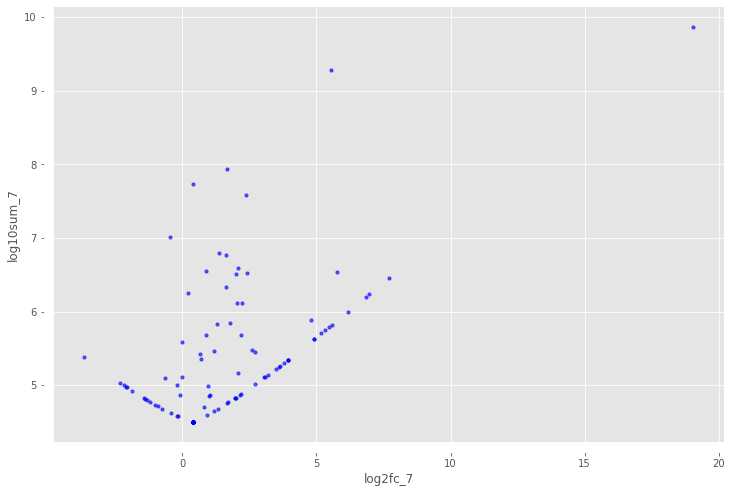

In [25]:

temp = df.copy()

#temp = temp[temp['Razor + unique peptides']>2]

fig,ax = plt.subplots(figsize=(12,8))
sns.regplot(x='log2fc_7', y='log10sum_7',
            fit_reg=False, data = temp,##[df['exp_lf']>0.8],
            ax=ax, scatter_kws={'s':10,'alpha':0.6},color='b')
sns.despine(offset=10, trim=True)
#x_val = temp.loc['Tb927.3.2610']['signal_perc']
#y_val = temp.loc['Tb927.3.2610']['Log10_score']
#ax.scatter(x_val,y_val, s=35, c='r')
#ax.annotate('Bait', xy=(x_val, y_val), xytext=(x_val+0.01, y_val),
#            )

#x_val = temp.loc['Tb927.11.11750']['signal_perc']
#y_val = temp.loc['Tb927.11.11750']['Log10_score']
#ax.scatter(x_val,y_val, s=35, c='r')
#ax.annotate('Tb927.11.11750', xy=(x_val, y_val), xytext=(x_val+0.01, y_val),
#            )
plt.savefig('Plot_3.svg')
plt.savefig('Plot_3.png')

In [26]:
#from IPython.display import IFrame
#IFrame(src='1vs5.html', width=700, height=600)

No handles with labels found to put in legend.


1
1
no selection


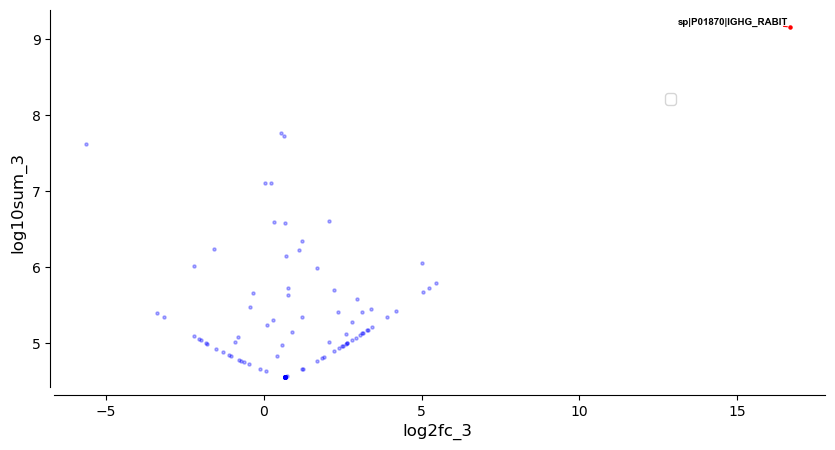

In [41]:
plt.style.use('default')
fig, axes=plt.subplots(figsize=(10,5), 
                     ncols=1, nrows=1)

ids = df[(df['log2fc_3']>5) & (df['log2fc_3']>6)]

_ids = ids.index.values
_names = ids['Gene_id'].values

print(len(_ids))
print(len(_names))
ax=axes
UT.make_vulcano(df, ax, x='log2fc_3', y='log10sum_3', 
             annot_index=_ids,
             annot_names = _names,
             title='',
             #fc_limit=70,
             fc_col='log2fc_1',
                  alpha_main=0.3,
             point_size_selection=5,
             point_size_all=5,
            text_size=7,
                  fontdict=fontProperties_names
            )

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
xmin, xmax = ax.get_xlim()
ax.spines['bottom'].set_bounds(xmin+0.1, xmax)
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(ymin+0.1, ymax)
plt.savefig('Plot_12.svg')
plt.savefig('Plot_12.png')

No handles with labels found to put in legend.


5
5
no selection


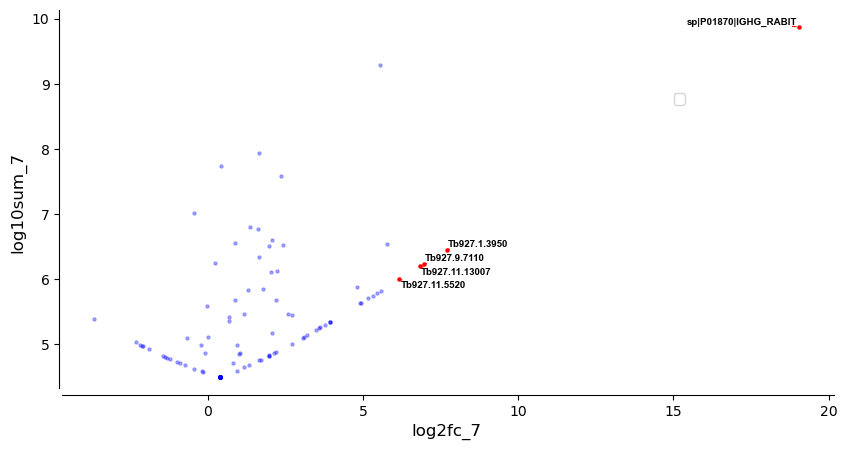

In [42]:
plt.style.use('default')
fig, axes=plt.subplots(figsize=(10,5), 
                     ncols=1, nrows=1)

ids = df[(df['log10sum_7']>5) & (df['log2fc_7']>6)]

_ids = ids.index.values
_names = ids['Gene_id'].values

print(len(_ids))
print(len(_names))
ax=axes
UT.make_vulcano(df, ax, x='log2fc_7', y='log10sum_7', 
             annot_index=_ids,
             annot_names = _names,
             title='',
             #fc_limit=70,
             fc_col='log2fc_1',
                  alpha_main=0.3,
             point_size_selection=5,
             point_size_all=5,
            text_size=7,
                  fontdict=fontProperties_names
            )

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
xmin, xmax = ax.get_xlim()
ax.spines['bottom'].set_bounds(xmin+0.1, xmax)
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(ymin+0.1, ymax)
plt.savefig('Plot_13.svg')
plt.savefig('Plot_13.png')

13
13
no selection


No handles with labels found to put in legend.


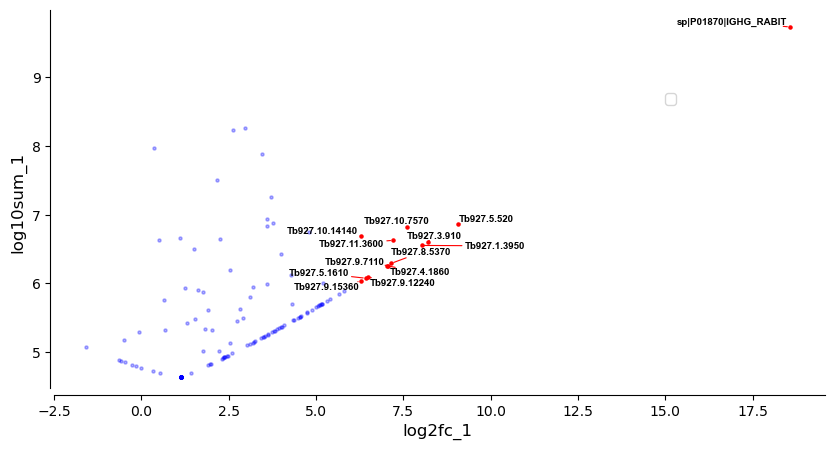

In [43]:
plt.style.use('default')
fig, axes=plt.subplots(figsize=(10,5), 
                     ncols=1, nrows=1)

ids = df[(df['log10sum_1']>5) & (df['log2fc_1']>6)]

_ids = ids.index.values
_names = ids['Gene_id'].values

print(len(_ids))
print(len(_names))
ax=axes
UT.make_vulcano(df, ax, x='log2fc_1', y='log10sum_1', 
             annot_index=_ids,
             annot_names = _names,
             title='',
             #fc_limit=70,
             fc_col='log2fc_1',
                  alpha_main=0.3,
             point_size_selection=5,
             point_size_all=5,
            text_size=7,
                  fontdict=fontProperties_names
            )

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
xmin, xmax = ax.get_xlim()
ax.spines['bottom'].set_bounds(xmin+0.1, xmax)
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(ymin+0.1, ymax)
plt.savefig('Plot_14.svg')
plt.savefig('Plot_14.png')

In [45]:
!ipython nbconvert --to HTML make_dataset.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook make_dataset.ipynb to HTML
[NbConvertApp] Writing 571199 bytes to make_dataset.html
